In [45]:
import numpy as np
import cv2 as cv
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Q1

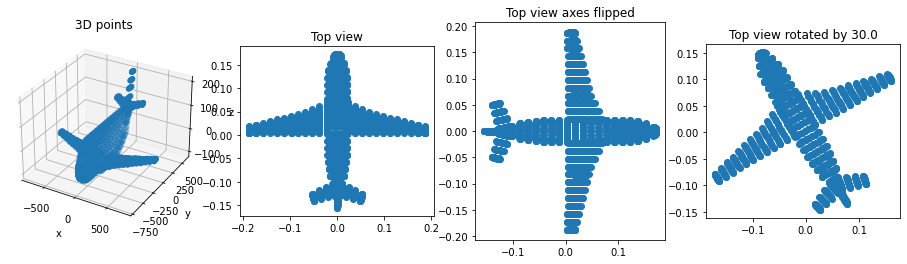

In [36]:
pcd = PlyData.read(r'./assets/airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)

# 2d view
ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis=0)

# Top view transformation
R1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
K1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
t1 = np.array([[0], [0], [-4000]])
P1 = K1 @ np.concatenate((R1,t1), axis=1)
x1 = P1 @ X
x1 = x1/x1[2,:]

# Rotated top view transformation
R2 = np.array([[0,1,0],[1,0,0],[0,0,1]])
P2 = K1 @ np.concatenate((R2,t1), axis=1)
x2 = P2 @ X
x2 = x2/x2[2,:]

# Rotated top view by 30
sin, cos = np.sin, np.cos
theta = np.pi*30/180
R3 = np.array([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
P3 = K1 @ np.concatenate((R3,t1), axis=1)
x3 = P3 @ X
x3 = x3/x3[2,:]

fig = plt.figure(figsize=(16,4))

ax3d = fig.add_subplot(141, projection='3d')
ax3d.scatter(points[0,:], points[1,:], points[2,:])
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')
ax3d.set_title('3D points')

axTop = fig.add_subplot(142)
axTop.scatter(x1[0,:], x1[1,:])
axTop.set_aspect('equal')
axTop.set_title('Top view')

axTopR = fig.add_subplot(143)
axTopR.scatter(x2[0,:], x2[1,:])
axTopR.set_aspect('equal')
axTopR.set_title('Top view axes flipped')

axTopR30 = fig.add_subplot(144)
axTopR30.scatter(x3[0,:], x3[1,:])
axTopR30.set_aspect('equal')
axTopR30.set_title(f'Top view rotated by {theta/np.pi*180}')

plt.show()

# Q2

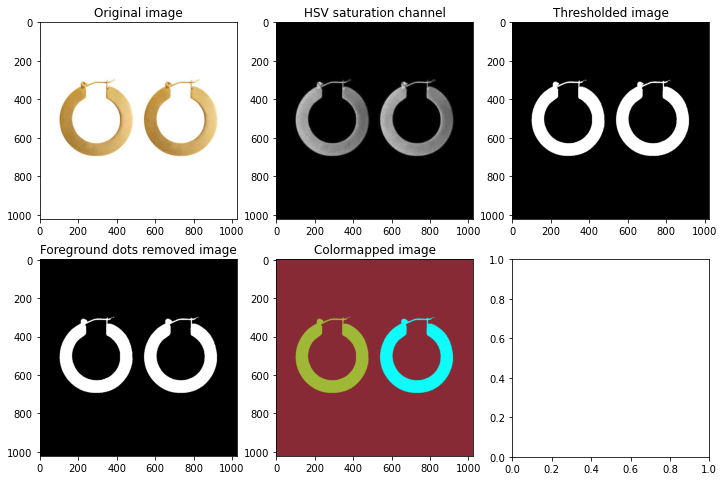

In [56]:
im = cv.imread(r'./assets/earrings.jpg', cv.IMREAD_ANYCOLOR)
assert im is not None

# segmentation
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th, bw = cv.threshold(hsv[:,:,1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Remove dots in the foreground
w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

# Get the connected components
retval, labels, stats, centroids = cv.connectedComponentsWithStats(opened)
colorMapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

# Display the results
fig, ax = plt.subplots(2,3, figsize=(4*3, 4*2))

ax[0][0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original image")
ax[0][1].imshow(hsv[:,:,1], cmap=cm.gray)
ax[0][1].set_title("HSV saturation channel")
ax[0][2].imshow(bw, cmap=cm.gray)
ax[0][2].set_title("Thresholded image")
ax[1][0].imshow(opened, cmap=cm.gray)
ax[1][0].set_title("Foreground dots removed image")
ax[1][1].imshow(colorMapped, cmap=cm.gray)
ax[1][1].set_title("Colormapped image")

plt.show()